In [14]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [15]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500,
    "n_jobs" : -1
}

In [16]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [17]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
app_train = app_train.set_index("SK_ID_CURR")

In [18]:
MODEL_FILE = "1.1. Esembler_Logistic_Application.json"

In [25]:
with open(DATASET_DIR / "Models" / MODEL_FILE, 'r') as file:
    model_data = json.load(file)

In [26]:
y = app_train["TARGET"]
x = app_train.drop(["TARGET"], axis=1)

In [27]:
df = app_train

In [28]:
model = LogisticRegression(**LOG_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[model_data["keep"]]

X = df[model_data["keep"] + ["TARGET"]]
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

for train, test in kfold.split(x):
    model.fit(x[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.4f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.7928243509844732
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.7855698178420664
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.7853722573539494
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.7861930041568123
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.7840356608614079


Durchschnitt: 0.7868
Standardabw.: 0.00
Varianz:      0.00


In [30]:
from sklearn.metrics import roc_curve

In [31]:
fpr, tpr, thresholds = roc_curve(y.iloc[test],model.predict_proba(x[test])[:,1])

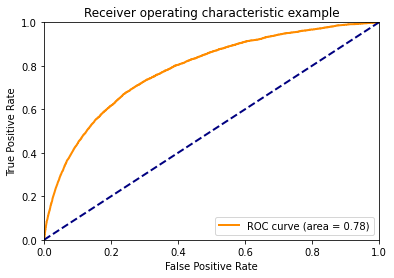

In [37]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()